In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
import subprocess
import sys

In [2]:
base_dir = os.getcwd()
exec_dir = '..'

# Construction test 1

First experiment: keep the page capacity constant and change the number of input records. Then measure how the construction time varies.


In [3]:
sizes = [int(i/100*100000) for i in np.linspace(10,100,num=10)]

In [4]:
# Create slices of the original data set.
df = pd.read_csv('{}/data/crash_data.csv'.format(base_dir))
for s in sizes:
    part = df.head(s)
    part.to_csv('{}/test_construction/crash_data_{}.csv'.format(base_dir, s), index=False)

In [12]:
# Test the implementation.

capacity = 100
ntrials = 20
output_file = '{}/test_construction/test_construction.csv'.format(base_dir)

f = open(output_file, 'w')

os.chdir(exec_dir)

for m in sizes:
    if (m == 0): 
        continue
    print('Testing m={}...'.format(m))
    input_file = "{}/test_construction/crash_data_{}.csv".format(base_dir, m)
    print('Input file: ' + input_file)
    avg = 0
    for i in range(0, ntrials):
        p = subprocess.run(["./TestIndex", input_file, str(capacity)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg += int((lines[3].split(':'))[1])
    avg = avg / ntrials
    print(avg)
    f.write('{},{}\n'.format(m, avg))

f.close()

os.chdir(base_dir)

Testing m=10000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
21716.75
Testing m=20000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_20000.csv
41385.4
Testing m=30000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_30000.csv
61645.85
Testing m=40000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_40000.csv
84283.15
Testing m=50000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
104563.0
Testing m=60000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_60000.csv
128169.45
Testing m=70000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_70000.csv
147458.55
Testing m=80000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_80000.csv
170136.0
Testing m=90000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_90000.csv
188938.15
Testing m=100000...
Input file: /Users/matteo/CSQV/test/test_constructi

In [13]:
# Print the results.
pd.set_option("display.precision", 3)
df1 = pd.read_csv(output_file, header=None)
df1.columns = ['m', 'time']
df1.sort_values(ascending=True, by='m', inplace=True)
df1['time'] /= 1000
df1

,m,time
0,10000,21.717
1,20000,41.385
2,30000,61.646
3,40000,84.283
4,50000,104.563
5,60000,128.169
6,70000,147.459
7,80000,170.136
8,90000,188.938
9,100000,212.239


In [17]:
print(df1.to_latex(index=False, escape=False))

\begin{tabular}{rr}
\toprule
     m &    time \\
\midrule
 10000 &  21.717 \\
 20000 &  41.385 \\
 30000 &  61.646 \\
 40000 &  84.283 \\
 50000 & 104.563 \\
 60000 & 128.169 \\
 70000 & 147.459 \\
 80000 & 170.136 \\
 90000 & 188.938 \\
100000 & 212.239 \\
\bottomrule
\end{tabular}



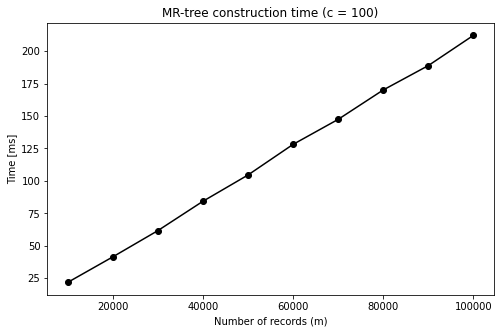

In [19]:
# Generate a plot.
plt.figure(figsize=(8, 5))
plt.title("MR-tree construction time (c = 100)")
plt.plot(df1['m'], df1['time'], marker='o', color='black')
#plt.plot([x for x in range(100, 100000)], 
#         [15*np.log2(x) for x in range(100, 100000)], color='black', linestyle=':')
plt.ylabel("Time [ms]")
plt.xlabel("Number of records (m)")
plt.savefig("{}/test_construction/test_construction.png".format(base_dir), dpi=170, format='png', bbox_inches='tight')

# Construction test 2

The page capacity $c = m/k$ is a fixed fraction of the data set size $m$. 

In [8]:
k = 10
ntrials = 20
output_file = '{}/test_construction/test_construction_fraction.csv'.format(base_dir)

f = open(output_file, 'w')

os.chdir(exec_dir)

for m in sizes:
    print('Testing m={}...'.format(m))
    input_file = "{}/test_construction/crash_data_{}.csv".format(base_dir, m)
    print('Input file: ' + input_file)
    c = int(m/k)
    avg = 0
    for i in range(0, ntrials):
        p = subprocess.run(["./TestIndex", input_file, str(c)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg += int((lines[3].split(':'))[1])
    avg = avg / ntrials
    f.write('{},{}\n'.format(m, avg))

f.close()
os.chdir(base_dir)
print('Done!')

Testing m=10000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
Testing m=20000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_20000.csv
Testing m=30000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_30000.csv
Testing m=40000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_40000.csv
Testing m=50000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
Testing m=60000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_60000.csv
Testing m=70000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_70000.csv
Testing m=80000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_80000.csv
Testing m=90000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_90000.csv
Testing m=100000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_100000.csv
Done!


In [9]:
# Print the results.
pd.set_option("display.precision", 3)
df1 = pd.read_csv(output_file, header=None)
columns = ['m', 'time']
#for k in capacities: columns.append(str('m/{}'.format(int(k))))
df1.columns = columns
df1.sort_values(ascending=True, by='m', inplace=True)
df1['time'] /= 1000
df1

,m,time
0,10000,27.674
1,20000,44.290
2,30000,65.366
3,40000,95.104
4,50000,119.775
5,60000,141.205
6,70000,156.249
7,80000,179.447
8,90000,201.297
9,100000,231.153


Text(0.5, 0, 'Number of records (m)')

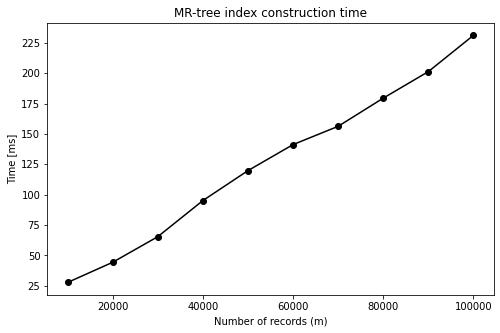

In [10]:
# Generate a plot.
plt.figure(figsize=(8, 5))
plt.title("MR-tree index construction time")
plt.plot(df1['m'], df1['time'], marker='o', color='black')
#plt.plot([x for x in range(100, 100000)], 
#         [15*np.log2(x) for x in range(100, 100000)], color='black', linestyle=':')
plt.ylabel("Time [ms]")
plt.xlabel("Number of records (m)")
#plt.savefig("{}/test_construction/test_construction_fraction.png".format(base_dir), dpi=170, format='png', bbox_inches='tight')

# Construction test 3

We fix the number of records $m$ and change the capacity $c$.

In [29]:
m = 50000
ntrials = 20
capacity = [int(x) for x in np.linspace(10, m, num=20)]
output_file = '{}/test_construction/test_construction_capacity.csv'.format(base_dir)
print(capacity)

[10, 2641, 5272, 7903, 10534, 13165, 15796, 18427, 21058, 23689, 26320, 28951, 31582, 34213, 36844, 39475, 42106, 44737, 47368, 50000]


In [30]:
# Test the implementation.

f = open(output_file, 'w')

os.chdir(exec_dir)

for c in capacity:
    print('Testing c={}...'.format(c))
    input_file = '{}/test_construction/crash_data_{}.csv'.format(base_dir, m)
    print('Input file: ' + input_file)
    avg = 0
    for i in range(0, ntrials):
        p = subprocess.run(['./TestIndex', input_file, str(c)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg += int((lines[3].split(':'))[1])
    avg = avg / ntrials
    print(avg)
    f.write('{},{}\n'.format(c, avg))

f.close()

os.chdir(base_dir)
print('Done!')

Testing c=10...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
125024.2
Testing c=2641...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
110001.55
Testing c=5272...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
109169.25
Testing c=7903...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
109780.65
Testing c=10534...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
109886.35
Testing c=13165...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
110446.4
Testing c=15796...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
109819.6
Testing c=18427...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
110288.8
Testing c=21058...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
110665.1
Testing c=23689...
Input file: /Users/matteo/CSQV/test/test_construction/cr

In [31]:
# Print the results.
pd.set_option("display.precision", 3)
df1 = pd.read_csv(output_file, header=None)
columns = ['c', 'time']
df1.columns = columns
df1.sort_values(ascending=True, by='c', inplace=True)
df1['time'] /= 1000
df1

,c,time
0,10,125.024
1,2641,110.002
2,5272,109.169
3,7903,109.781
4,10534,109.886
5,13165,110.446
6,15796,109.820
7,18427,110.289
8,21058,110.665
9,23689,110.363


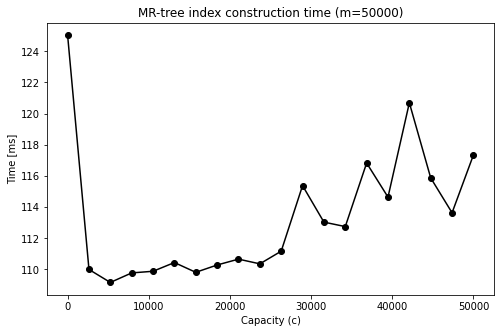

In [34]:
# Generate a plot.
plt.figure(figsize=(8, 5))
plt.title("MR-tree index construction time (m=50000)")
#plt.xscale('log')
plt.plot(df1['c'], df1['time'], marker='o', color='black')
plt.ylabel("Time [ms]")
plt.xlabel("Capacity (c)")
plt.savefig("{}/test_construction/test_construction_capacity.eps".format(base_dir), format='eps', bbox_inches='tight')